# Aim
 
`train word2vec models to find robust networks`  
`measure the variation in word distances`  
`vectorize words`    
`sentence -> tokenize -> count frequency`   
`train a word2vec neural network`    
`visulaize the results`  
`n-dimension vector -> 2-dimension vector -> visulaize`  


**References**

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/


In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords, webtext
from nltk.stem import PorterStemmer
from textblob import Word
import seaborn as sns
from textblob import TextBlob
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import bs4
import requests
import multiprocessing

# fetch data from wikipedia

In [2]:
response = requests.get("https://en.wikipedia.org/wiki/Cancer")

if response is not None:
    html = bs4.BeautifulSoup(response.text, 'html.parser')
    title = html.select("#firstHeading")[0].text
    paragraphs = html.select("p")
    text = '\n'.join([ para.text for para in paragraphs])

# clean data and tokenize

In [3]:
# Split data by sentence and create dataframe
df = pd.DataFrame({'data': text.split(".")})
# Convert to lowercase
df['data'] = df['data'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Remove Punctuation (! ? # etc.)
df['data'] = df['data'].str.replace('[^\w\s]', "")
# Stop words (is are to etc.)
stop_words = set(stopwords.words('english'))
df['data'] = df['data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
# Stemming (fish fishes fishing)
st = PorterStemmer()
df['data'] = df['data'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# Lemmatizing (good better best)
df['data'] = df['data'].apply(lambda x: "".join([Word(word).lemmatize() for word in x]))
# Tokenize (split to words)
df['tokenized_text'] = df['data'].apply(lambda x: nltk.word_tokenize(x))

# create vocabulary

In [4]:
# Vocabulary and size
vocabulary_size = len(df['tokenized_text'].apply(pd.Series).stack().unique())
vocabulary = df['tokenized_text'].apply(pd.Series).stack().unique()

# frequence

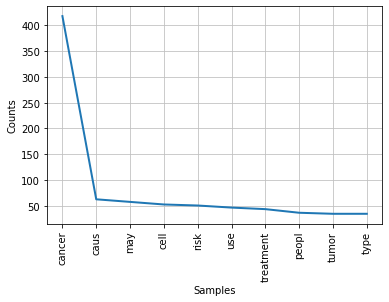

In [5]:
# convert dataframe to list
sum_data = sum(df['tokenized_text'], [])
frequency_dist = nltk.FreqDist(sum_data)
frequency_dist.plot(10, cumulative=False)

# create model with gensim (Word2Vec)


**size**
The size of the dense vector that is to represent each token or word. 

**window**
The maximum distance between the target word and its neighboring word.

**min_count**
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. 

**workers**
How many threads to use behind the scenes?

In [6]:
model = Word2Vec (df['tokenized_text'], size=300, window=10, min_count=2, workers=multiprocessing.cpu_count())

# train a model

In [7]:
model.train(df['tokenized_text'],total_examples=len(df['tokenized_text']),epochs=10)
words = list(model.wv.vocab)
model.save('testmodel')

# test a model

In [8]:
model.wv.most_similar (positive=["cancer","tumor"],negative=["health"])

[('occur', 0.9999576807022095),
 ('use', 0.9999567270278931),
 ('includ', 0.9999552369117737),
 ('common', 0.9999551773071289),
 ('effect', 0.9999545812606812),
 ('diseas', 0.9999544024467468),
 ('may', 0.9999537467956543),
 ('treatment', 0.9999534487724304),
 ('cell', 0.9999527335166931),
 ('carcinoma', 0.9999526143074036)]

In [9]:
model.wv.similarity(w1="cancer", w2="tumor")

0.99998295

In [10]:
model.wv.most_similar (positive=["cell","tumor"])

[('cancer', 0.9999875426292419),
 ('may', 0.9999808073043823),
 ('diseas', 0.9999805688858032),
 ('treatment', 0.9999801516532898),
 ('occur', 0.9999798536300659),
 ('carcinoma', 0.9999778866767883),
 ('includ', 0.9999773502349854),
 ('use', 0.9999772906303406),
 ('tissu', 0.9999769330024719),
 ('common', 0.999976634979248)]